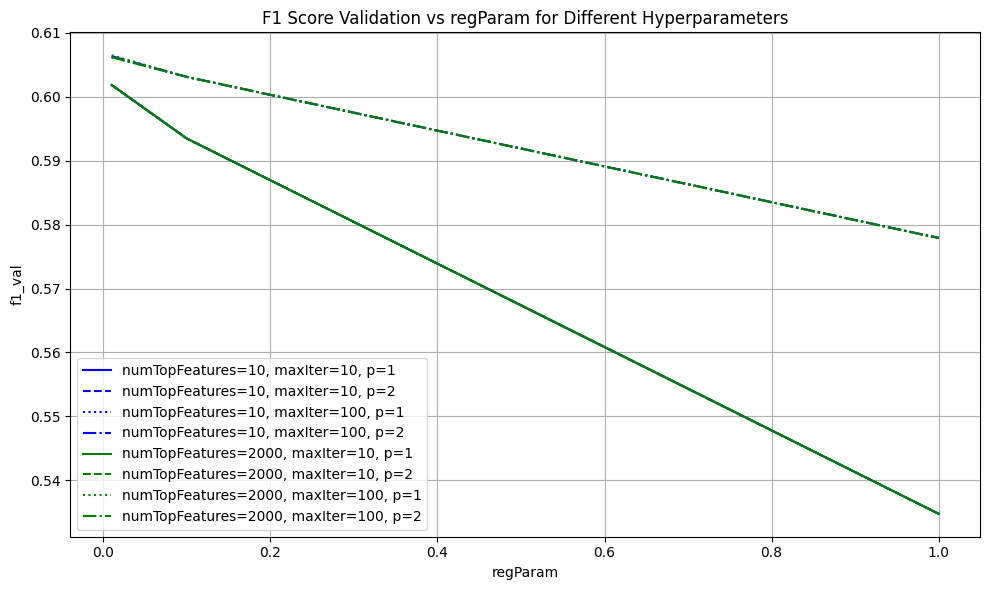

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

# Read the CSV data
data = pd.read_csv(r"data\model_training_metrics.csv")

# Define a color and linestyle dictionary
color_dict = {10: 'b', 2000: 'g'}
linestyle_dict = {(10, 1): 'solid', (10, 2): 'dashed', (100, 1): 'dotted', (100, 2): 'dashdot'}

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

for (numTopFeatures, maxIter, p), group in data.groupby(['numTopFeatures', 'maxIter', 'p']):
    color = color_dict[numTopFeatures]
    linestyle = linestyle_dict[(maxIter, p)]
    ax.plot(group['regParam'], group['f1_val'], label=f'numTopFeatures={numTopFeatures}, maxIter={maxIter}, p={p}', color=color, linestyle=linestyle)

# Add labels and title
ax.set_xlabel('regParam')
ax.set_ylabel('f1_val')
ax.set_title('F1 Score Validation vs regParam for Different Hyperparameters')
ax.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

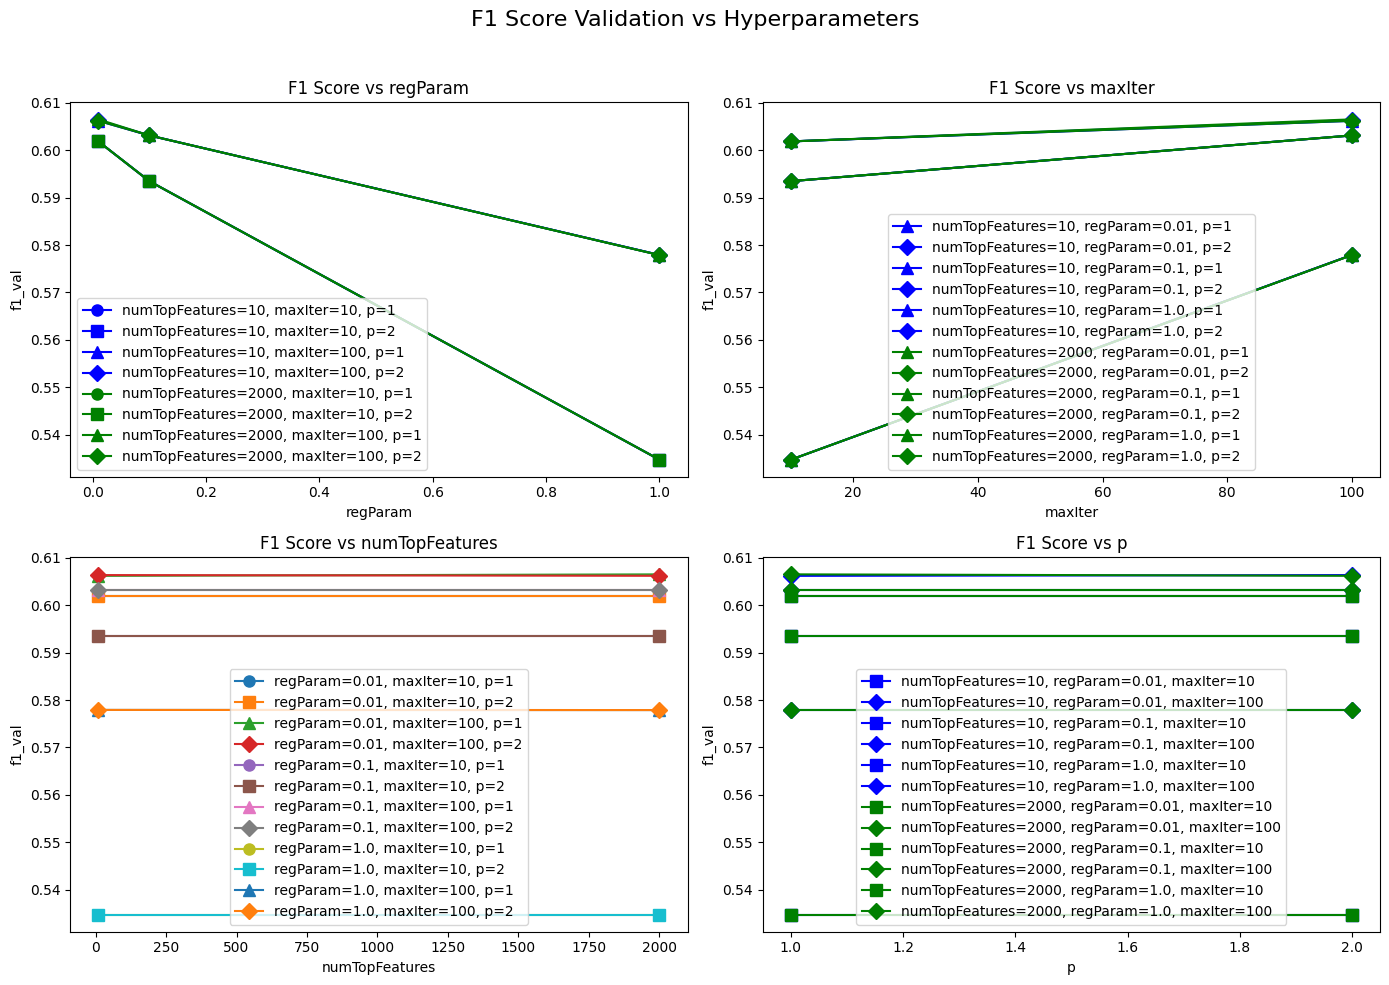

In [14]:
import matplotlib.pyplot as plt

# Define a color and marker dictionary
color_dict = {10: 'b', 2000: 'g'}
marker_dict = {(10, 1): 'o', (10, 2): 's', (100, 1): '^', (100, 2): 'D'}

# Create subplots for each hyperparameter
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('F1 Score Validation vs Hyperparameters', fontsize=16)

# Plot F1 score against regParam
for (numTopFeatures, maxIter, p), group in data.groupby(['numTopFeatures', 'maxIter', 'p']):
    color = color_dict[numTopFeatures]
    marker = marker_dict[(maxIter, p)]
    axes[0, 0].plot(group['regParam'], group['f1_val'], label=f'numTopFeatures={numTopFeatures}, maxIter={maxIter}, p={p}', 
                    color=color, marker=marker, linestyle='-', markersize=8)
axes[0, 0].set_xlabel('regParam')
axes[0, 0].set_ylabel('f1_val')
axes[0, 0].set_title('F1 Score vs regParam')
axes[0, 0].legend()

# Plot F1 score against maxIter
for (numTopFeatures, regParam, p), group in data.groupby(['numTopFeatures', 'regParam', 'p']):
    color = color_dict[numTopFeatures]
    marker = marker_dict[(maxIter, p)]
    axes[0, 1].plot(group['maxIter'], group['f1_val'], label=f'numTopFeatures={numTopFeatures}, regParam={regParam}, p={p}', 
                    color=color, marker=marker, linestyle='-', markersize=8)
axes[0, 1].set_xlabel('maxIter')
axes[0, 1].set_ylabel('f1_val')
axes[0, 1].set_title('F1 Score vs maxIter')
axes[0, 1].legend()

# Plot F1 score against numTopFeatures
for (regParam, maxIter, p), group in data.groupby(['regParam', 'maxIter', 'p']):
    marker = marker_dict[(maxIter, p)]
    axes[1, 0].plot(group['numTopFeatures'], group['f1_val'], label=f'regParam={regParam}, maxIter={maxIter}, p={p}', 
                    marker=marker, linestyle='-', markersize=8)
axes[1, 0].set_xlabel('numTopFeatures')
axes[1, 0].set_ylabel('f1_val')
axes[1, 0].set_title('F1 Score vs numTopFeatures')
axes[1, 0].legend()

# Plot F1 score against p
for (numTopFeatures, regParam, maxIter), group in data.groupby(['numTopFeatures', 'regParam', 'maxIter']):
    color = color_dict[numTopFeatures]
    marker = marker_dict[(maxIter, p)]
    axes[1, 1].plot(group['p'], group['f1_val'], label=f'numTopFeatures={numTopFeatures}, regParam={regParam}, maxIter={maxIter}', 
                    color=color, marker=marker, linestyle='-', markersize=8)
axes[1, 1].set_xlabel('p')
axes[1, 1].set_ylabel('f1_val')
axes[1, 1].set_title('F1 Score vs p')
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()